# Netflix Veri Analizi

Bu projede, online dizi/film izleme platformu olan Netflix'te yer alan içeriklerinin analizi yapılmıştır.

Kaynak veri seti: https://www.kaggle.com/datasets/shivamb/netflix-shows/data


In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

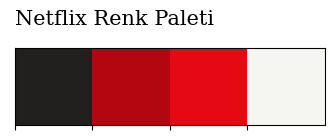

In [107]:
#Grafiklerde kullanmak için bir renk paleti oluşturalım

netflix_palette = ['#221f1f', '#b20710', '#e50914', '#f5f5f1']
sns.palplot(netflix_palette)
plt.title("Netflix Renk Paleti", loc='left', fontfamily='serif', fontsize=15, y=1.2)
plt.show()

In [43]:
df = pd.read_csv('netflix_titles.csv')

In [44]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [47]:
df.shape

(8807, 12)

In [48]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [46]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [9]:
df.nunique() #tekrarlanmayan değerlerin toplam sayıları

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

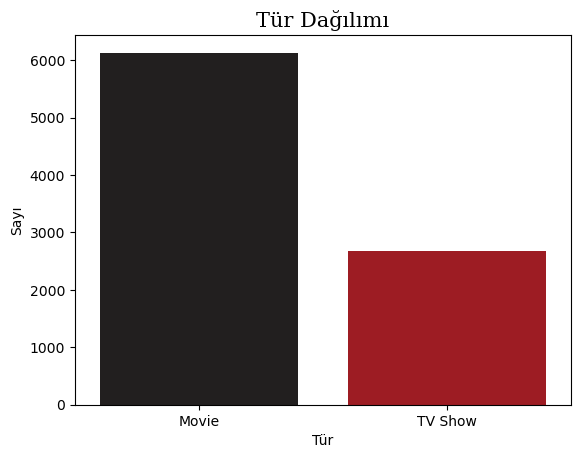

In [65]:
sns.countplot(data=df, x='type', palette=netflix_palette)
plt.title('Tür Dağılımı',fontfamily='serif', fontsize=15)
plt.xlabel('Tür')
plt.ylabel('Sayı')
plt.show()

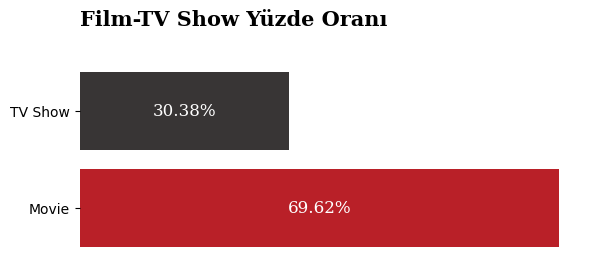

In [67]:
# 'type' sütunundaki verileri sayın
veri_tip_sayisi = df['type'].value_counts()

# Oranları hesaplayın
toplam_tip_sayisi = len(df['type'])
movie_orani = (veri_tip_sayisi.get('Movie', 0) / toplam_tip_sayisi) * 100
tv_show_orani = (veri_tip_sayisi.get('TV Show', 0) / toplam_tip_sayisi) * 100

# Oranları içeren bir veri çerçevesi oluşturun
oran_verileri = pd.DataFrame({'Type': ['Movie', 'TV Show'], 'Ratio': [movie_orani, tv_show_orani]})

# Yatay çubuk grafik oluşturun
fig, ax = plt.subplots(1, 1, figsize=(6.5, 2.5))

colors = ['#b20710', '#221f1f']  # Renkleri isteğe bağlı olarak değiştirin
ax.barh(oran_verileri['Type'], oran_verileri['Ratio'], color=colors, alpha=0.9)

# Oranları ekle
for i, ratio in enumerate(oran_verileri['Ratio']):
    ax.text(ratio / 2, i, f"{ratio:.2f}%", ha='center', va='center',
            fontsize=12, fontweight='light', fontfamily='serif', color='white')

# Başlık ve alt başlık
fig.text(0.125, 1.03, 'Film-TV Show Yüzde Oranı', fontfamily='serif', fontsize=15, fontweight='bold')

# Eksenleri gizle
ax.set_xticks([])

# Kenarlıkları gizle
for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)

# Göster
plt.show()


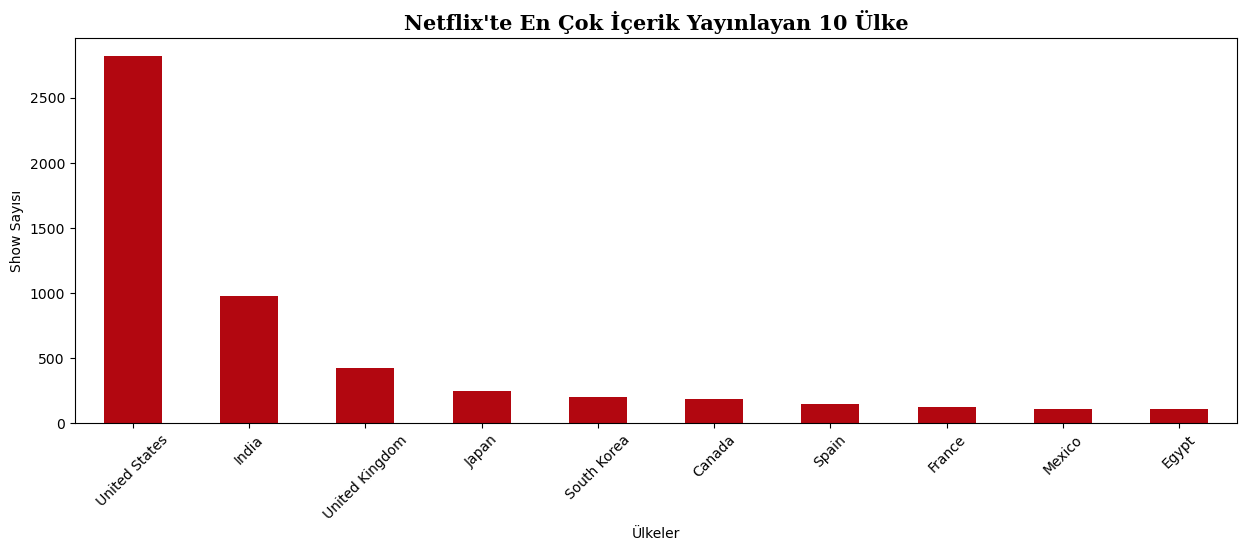

In [71]:
df['country'].value_counts().head(10).plot(kind='bar', figsize=(15,5), color=['#b20710'])
plt.title("Netflix'te En Çok İçerik Yayınlayan 10 Ülke", fontfamily='serif', fontsize=15,fontweight='bold') 
plt.xlabel("Ülkeler")
plt.xticks(rotation=45)
plt.ylabel("Show Sayısı")
plt.show()

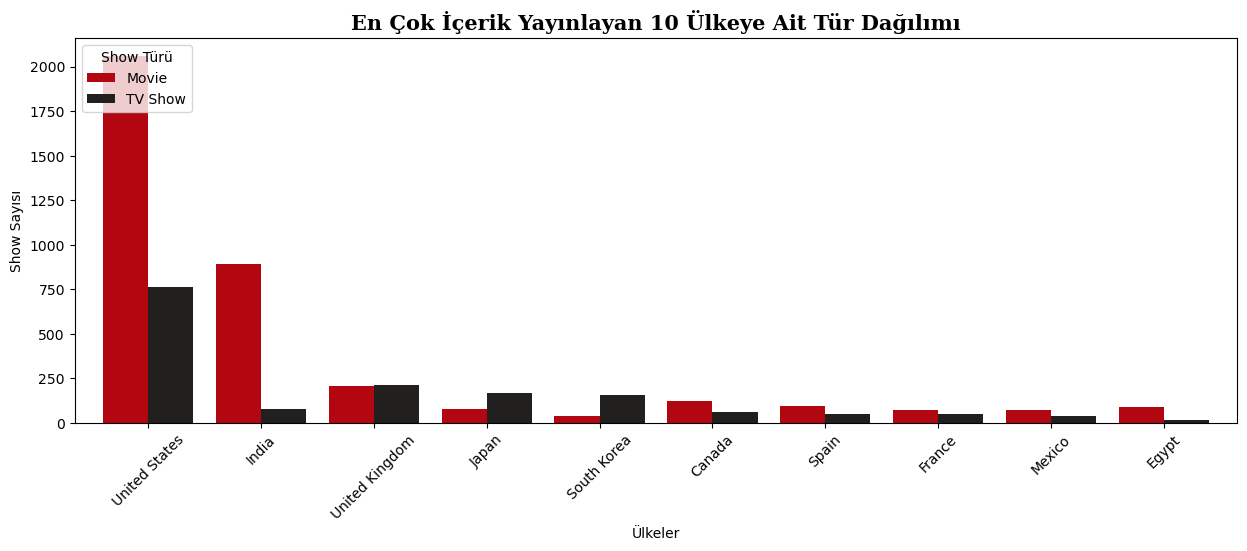

In [73]:
# Ülkelerin movie ve TV show sayılarını hesaplayın
ulkelerin_show_sayisi = df.groupby(['country', 'type']).size().unstack().fillna(0)

# Top 10 ülkeyi seçin
top_10_ulke = df['country'].value_counts().head(10).index

# Yatay çubuk grafiği oluşturun
ulkelerin_show_sayisi.loc[top_10_ulke].plot(kind='bar', figsize=(15, 5), width=0.8, color=['#b20710', '#221f1f'])

plt.title("En Çok İçerik Yayınlayan 10 Ülkeye Ait Tür Dağılımı",fontfamily='serif', fontsize=15,fontweight='bold')
plt.xlabel("Ülkeler")
plt.ylabel("Show Sayısı")
plt.xticks(rotation=45)
plt.legend(title='Show Türü', loc='upper left')
plt.show()

In [14]:
# 'listed_in' sütunundaki tüm kategorileri birleştirip virgülle ayırarak tek bir dizi oluştur
all_categories = ','.join(df['listed_in'].dropna()).split(',')

# Her bir kategori adını bir listeye ekle
unique_categories_list = []
for category in all_categories:
    category = category.strip()  # Boşlukları temizle
    if category not in unique_categories_list:
        unique_categories_list.append(category)

# Benzersiz kategorileri bir küme (set) haline getir
unique_categories = set(unique_categories_list)

    # 'listed_in' sütunundaki tüm kategorileri birleştirip virgülle ayırarak tek bir dizi oluştur
all_categories = ','.join(df['listed_in'].dropna()).split(',')

# Her bir kategori adını bir listeye ekle
unique_categories_list = []
for category in all_categories:
    category = category.strip()  # Boşlukları temizle
    if category not in unique_categories_list:
        unique_categories_list.append(category)

# Benzersiz kategorileri bir küme (set) haline getir
unique_categories = set(unique_categories_list)

print(f"Toplam benzersiz kategori sayısı: {len(unique_categories)}")
print("\nBenzersiz kategoriler:")
for category in unique_categories:
    matching_rows = df[df['listed_in'].str.contains(category, case=False, na=False)]
    product_count = len(matching_rows)
    print(f"{category}: {product_count}")


Toplam benzersiz kategori sayısı: 42

Benzersiz kategoriler:
TV Dramas: 763
Thrillers: 634
Crime TV Shows: 470
Children & Family Movies: 641
TV Shows: 1755
Sports Movies: 219
International Movies: 2752
Music & Musicals: 375
Documentaries: 869
TV Sci-Fi & Fantasy: 84
Horror Movies: 357
Stand-Up Comedy: 399
Action & Adventure: 1027
TV Horror: 75
Romantic Movies: 616
TV Mysteries: 98
TV Action & Adventure: 168
Reality TV: 255
Kids' TV: 451
International TV Shows: 1351
Comedies: 2255
Stand-Up Comedy & Talk Shows: 56
Korean TV Shows: 151
Romantic TV Shows: 370
TV Thrillers: 57
Independent Movies: 756
Spanish-Language TV Shows: 174
TV Comedies: 581
Anime Series: 176
Science & Nature TV: 92
LGBTQ Movies: 102
Docuseries: 395
British TV Shows: 253
Teen TV Shows: 69
Faith & Spirituality: 65
Classic Movies: 116
Sci-Fi & Fantasy: 327
Cult Movies: 71
Anime Features: 71
Dramas: 3190
Movies: 4502
Classic & Cult TV: 28


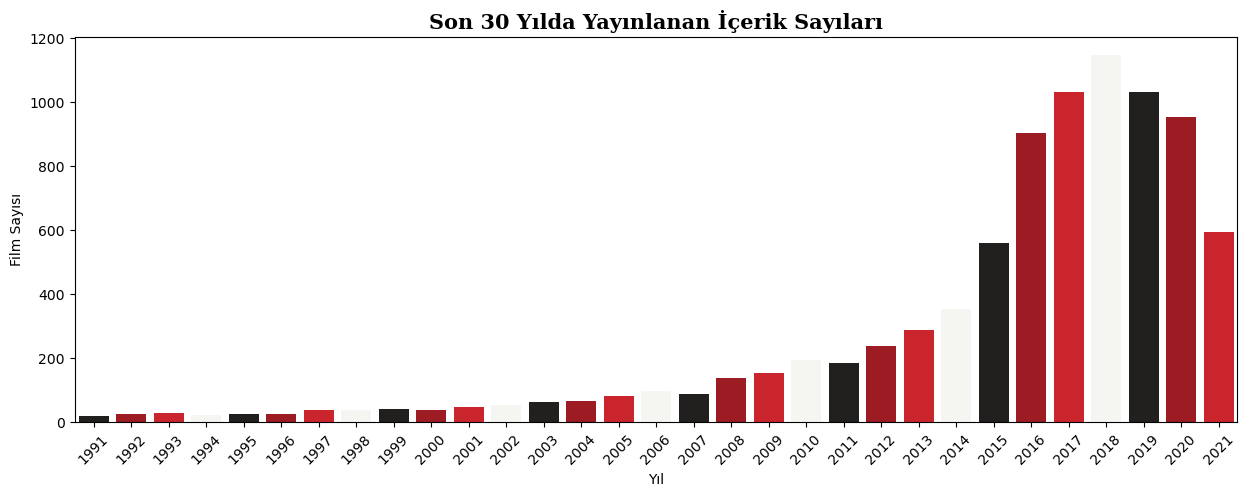

In [75]:
# Son 30 yılın filmlerini seç
son_30_yil = df[df['release_year'] >= df['release_year'].max() - 30]

plt.figure(figsize=(15, 5))
sns.countplot(data=son_30_yil, x='release_year', palette=netflix_palette)
plt.title('1990-2021 Yılları Arasında Yayınlanan İçerik Sayıları',fontfamily='serif', fontsize=15,fontweight='bold')
plt.xlabel('Yıl')
plt.ylabel('Film Sayısı')
plt.xticks(rotation=45)
plt.show()

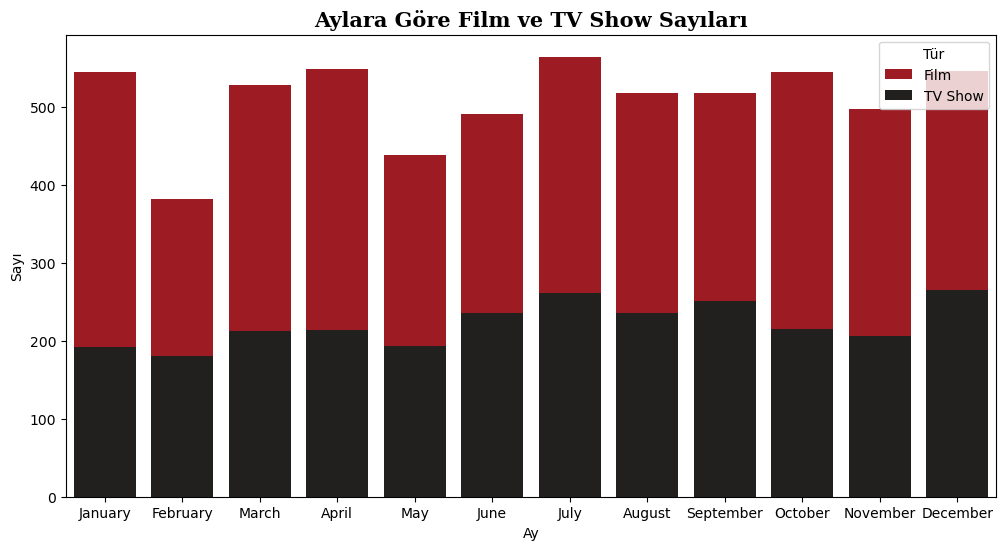

In [119]:
# 'date_added' sütununu datetime türüne çevirme
df['date_added'] = pd.to_datetime(df['date_added'])

# 'date_added' sütunundan ayları çıkarma
df['month_added'] = df['date_added'].dt.month_name()

# Aylara göre film ve TV show sayılarını hesaplama
monthly_counts = df.groupby(['month_added', 'type']).size().unstack().fillna(0)

# Ayları sıralı bir şekilde düzenleme
ordered_months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthly_counts = monthly_counts.reindex(ordered_months)

# 'Film' ve 'TV Show' sütun isimlerini 'Movie' ve 'TV Show' olarak değiştirme
monthly_counts.columns = ['Movie', 'TV Show']


# Grafik oluşturma
plt.figure(figsize=(12, 6))
sns.barplot(data=monthly_counts.reset_index(), x='month_added', y='Movie', label='Film',color='#b20710', dodge=True)
sns.barplot(data=monthly_counts.reset_index(), x='month_added', y='TV Show', label='TV Show', color='#221f1f', dodge=True)

# Grafik özellikleri
plt.title('Aylara Göre Film ve TV Show Sayıları',fontfamily='serif', fontsize=15,fontweight='bold')
plt.xlabel('Ay')
plt.ylabel('Sayı')
plt.legend(title='Tür')
plt.show()


In [76]:
# 'listed_in' sütunundaki türleri sayın
genre_counts = df['listed_in'].str.split(', ').explode().value_counts()

# Türleri ve sayılarını listeleyin
print(genre_counts)

International Movies            2752
Dramas                          2427
Comedies                        1674
International TV Shows          1351
Documentaries                    869
Action & Adventure               859
TV Dramas                        763
Independent Movies               756
Children & Family Movies         641
Romantic Movies                  616
TV Comedies                      581
Thrillers                        577
Crime TV Shows                   470
Kids' TV                         451
Docuseries                       395
Music & Musicals                 375
Romantic TV Shows                370
Horror Movies                    357
Stand-Up Comedy                  343
Reality TV                       255
British TV Shows                 253
Sci-Fi & Fantasy                 243
Sports Movies                    219
Anime Series                     176
Spanish-Language TV Shows        174
TV Action & Adventure            168
Korean TV Shows                  151
C

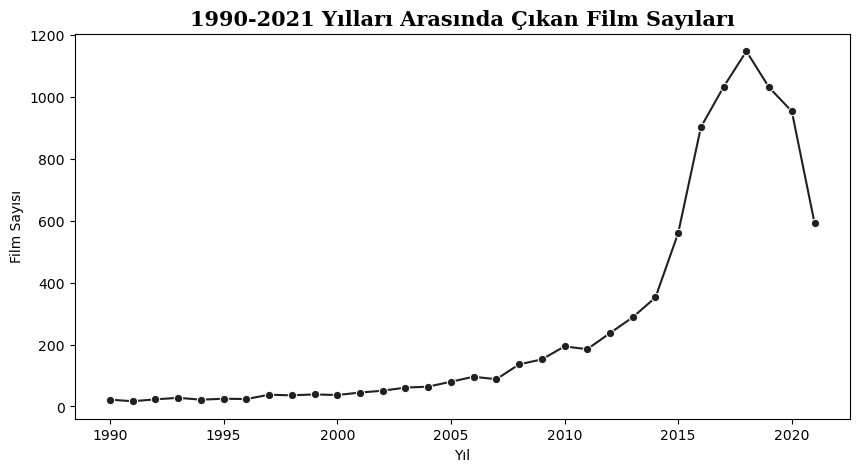

In [80]:
# Son 30 yılı seçin
df_last_30_years = df[df['release_year'] >= 1990]

# Her yılın film sayısını hesaplayın
film_sayisi = df_last_30_years.groupby('release_year').size().reset_index(name='film_sayisi')

# Çizgi grafiği oluşturun
plt.figure(figsize=(10, 5))
sns.lineplot(data=film_sayisi, x='release_year', y='film_sayisi', marker='o',color='#221f1f')
plt.title('1990-2021 Yılları Arasında Çıkan Film Sayıları',fontfamily='serif', fontsize=15,fontweight='bold')
plt.xlabel('Yıl')
plt.ylabel('Film Sayısı')
plt.show()


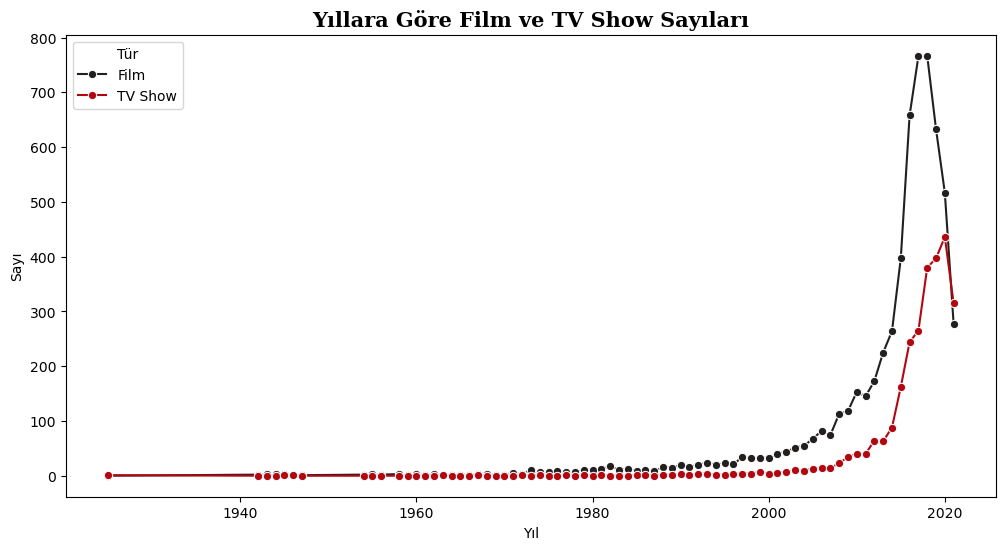

In [120]:
# 'release_year' sütununu kullanarak yıllara göre film ve TV show sayılarını hesapla
yearly_counts = df.groupby(['release_year', 'type']).size().unstack().fillna(0)

# Çizgi grafiği oluştur
plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_counts.reset_index(), x='release_year', y='Movie', label='Film', marker='o',color='#221f1f')
sns.lineplot(data=yearly_counts.reset_index(), x='release_year', y='TV Show', label='TV Show', marker='o',color='#b20710')

# Grafik özellikleri
plt.title('Yıllara Göre Film ve TV Show Sayıları',fontfamily='serif', fontsize=15,fontweight='bold')
plt.xlabel('Yıl')
plt.ylabel('Sayı')
plt.legend(title='Tür')
plt.show()

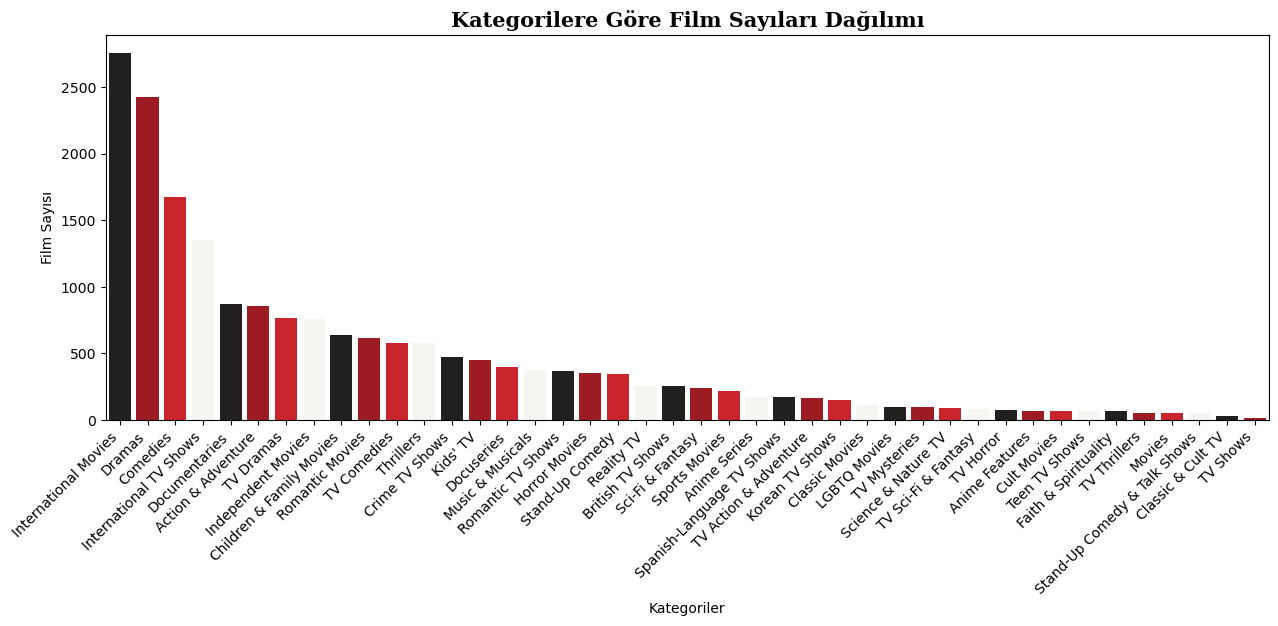

In [82]:
plt.figure(figsize=(15, 5))
sns.barplot(x=genre_counts.index, y=genre_counts, palette=netflix_palette)
plt.title('Kategorilere Göre Film Sayıları Dağılımı',fontfamily='serif', fontsize=15,fontweight='bold')
plt.xlabel('Kategoriler')
plt.ylabel('Film Sayısı')
plt.xticks(rotation=45, ha='right')
plt.show()

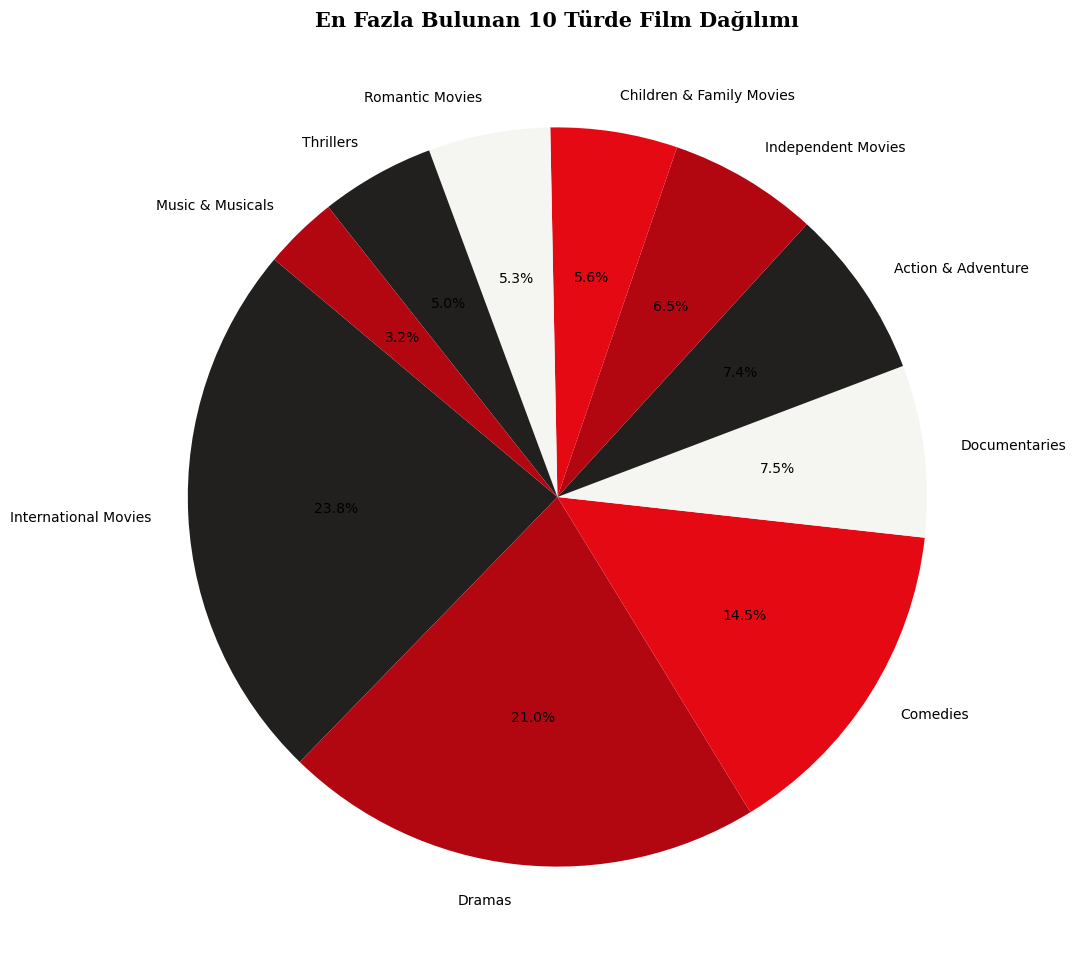

In [84]:
# Filmleri seçin
filmler = df[df['type'] == 'Movie']

# listed_in sütunundaki benzersiz türleri bulun ve en çok tekrar eden 10 türü seçin
en_fazla_bulunan_turler = filmler['listed_in'].str.split(', ').explode().value_counts().head(10)

# Türlerin film dağılımını gösteren bir pasta grafiği oluşturun
plt.figure(figsize=(12, 12))
plt.pie(en_fazla_bulunan_turler, labels=en_fazla_bulunan_turler.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette(netflix_palette))
plt.title('En Fazla Bulunan 10 Türde Film Dağılımı',fontfamily='serif', fontsize=15,fontweight='bold')
plt.show()


<Figure size 1200x600 with 0 Axes>

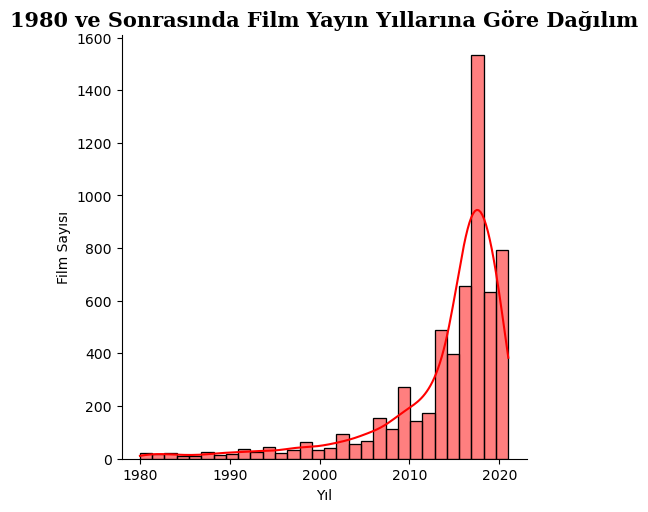

In [85]:
plt.figure(figsize=(12, 6))
sns.displot(data=df[(df['type'] == 'Movie') & (df['release_year'] >= 1980)], x='release_year', kde=True, bins=30, color='red')
plt.title('1980 ve Sonrasında Film Yayın Yıllarına Göre Dağılım',fontfamily='serif', fontsize=15,fontweight='bold')
plt.xlabel('Yıl')
plt.ylabel('Film Sayısı')
plt.show()

In [86]:
# 'director' sütunundaki yönetmenleri sayın
director_counts = df['director'].value_counts()

# En fazla içerik üreten 10 yönetmeni seçin
top_directors = director_counts.head(10)

# Sonuçları gösterin
print(top_directors)

Rajiv Chilaka             19
Raúl Campos, Jan Suter    18
Marcus Raboy              16
Suhas Kadav               16
Jay Karas                 14
Cathy Garcia-Molina       13
Martin Scorsese           12
Youssef Chahine           12
Jay Chapman               12
Steven Spielberg          11
Name: director, dtype: int64


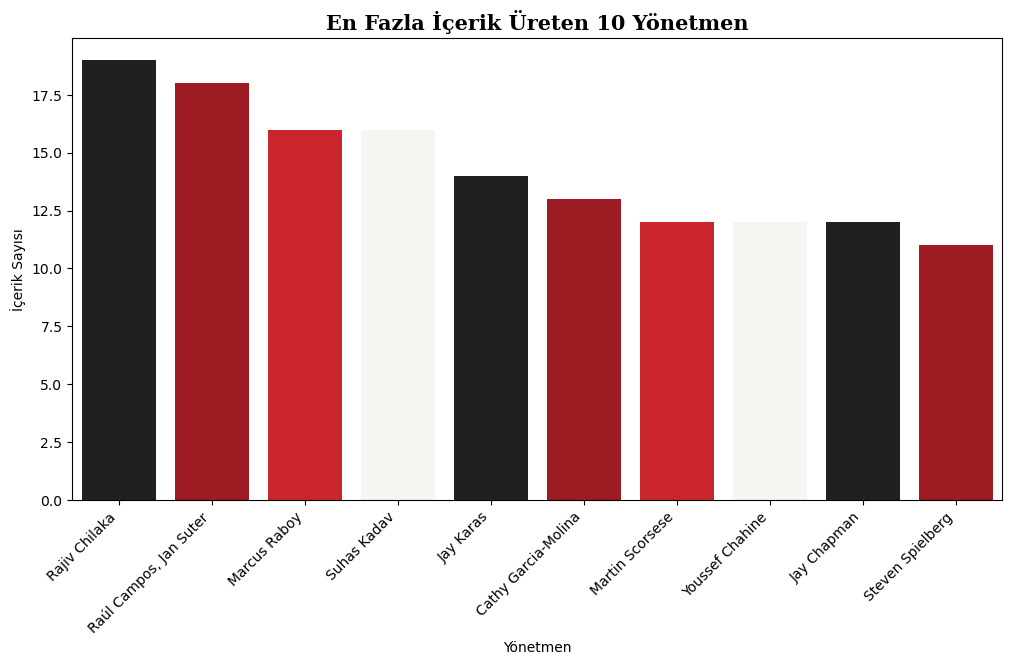

In [87]:


# Bar grafiğini oluşturun
plt.figure(figsize=(12, 6))
sns.barplot(x=top_directors.index, y=top_directors.values, palette=netflix_palette)
plt.title('En Fazla İçerik Üreten 10 Yönetmen',fontfamily='serif', fontsize=15,fontweight='bold')
plt.xlabel('Yönetmen')
plt.ylabel('İçerik Sayısı')
plt.xticks(rotation=45, ha='right')
plt.show()


In [88]:
unique_durations = df['duration'].unique()
print(unique_durations)
# Nan değerleri temizleyin
df = df.dropna(subset=['duration'])

# 'min' içeren süreleri sayısal formata çevirin
df['duration'] = df['duration'].str.extract('(\d+)').astype(float)

# Süre ve sayıları içeren bir DataFrame oluşturun
duration_counts = pd.DataFrame({'duration': df['duration'].value_counts().index, 'count': df['duration'].value_counts().values})


['90 min' '2 Seasons' '1 Season' '91 min' '125 min' '9 Seasons' '104 min'
 '127 min' '4 Seasons' '67 min' '94 min' '5 Seasons' '161 min' '61 min'
 '166 min' '147 min' '103 min' '97 min' '106 min' '111 min' '3 Seasons'
 '110 min' '105 min' '96 min' '124 min' '116 min' '98 min' '23 min'
 '115 min' '122 min' '99 min' '88 min' '100 min' '6 Seasons' '102 min'
 '93 min' '95 min' '85 min' '83 min' '113 min' '13 min' '182 min' '48 min'
 '145 min' '87 min' '92 min' '80 min' '117 min' '128 min' '119 min'
 '143 min' '114 min' '118 min' '108 min' '63 min' '121 min' '142 min'
 '154 min' '120 min' '82 min' '109 min' '101 min' '86 min' '229 min'
 '76 min' '89 min' '156 min' '112 min' '107 min' '129 min' '135 min'
 '136 min' '165 min' '150 min' '133 min' '70 min' '84 min' '140 min'
 '78 min' '7 Seasons' '64 min' '59 min' '139 min' '69 min' '148 min'
 '189 min' '141 min' '130 min' '138 min' '81 min' '132 min' '10 Seasons'
 '123 min' '65 min' '68 min' '66 min' '62 min' '74 min' '131 min' '39 min'
 '46 m

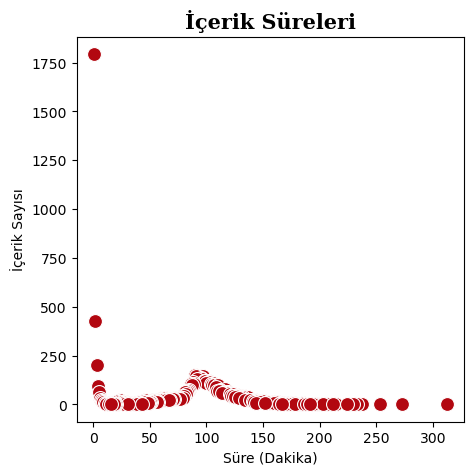

In [122]:
# Scatterplot oluşturun
plt.figure(figsize=(5, 5))
sns.scatterplot(data=duration_counts, x='duration', y='count', palette='viridis', s=100,color='#b20710')

# Grafik özellikleri
plt.title('İçerik Süreleri',fontfamily='serif', fontsize=15,fontweight='bold')
plt.xlabel('Süre (Dakika)')
plt.ylabel('İçerik Sayısı')

# Grafik gösterimi
plt.show()

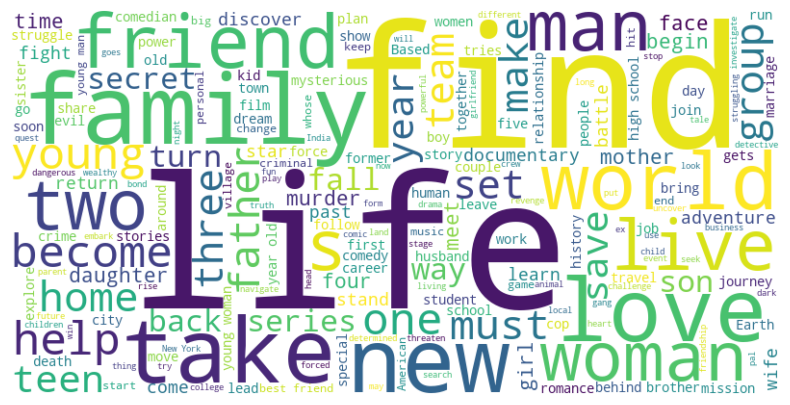

In [117]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Tüm açıklamaları birleştirin
all_descriptions = ' '.join(df['description'])

# WordCloud nesnesi oluşturun ve renk paletini belirtin
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(all_descriptions)

# WordCloud'u görselleştirin
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
